In [ ]:
import glob
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

run_dirs = sorted(glob.glob("results/embeddings/run_*"))


print(f"Found {len(run_dirs)} embedding runs")

def load_run(run_dir):
    run = {}
    run["name"] = os.path.basename(run_dir)

    # embeddings + labels
    emb = np.load(os.path.join(run_dir, "embeddings.npz"))
    run["embeddings"] = emb["embeddings"]
    run["labels"] = emb["labels"]

    # UMAP projection
    run["umap"] = pd.read_csv(
        os.path.join(run_dir, "umap_2d.csv")
    )[["x", "y"]].values

    # metrics
    with open(os.path.join(run_dir, "metrics.json")) as f:
        run["metrics"] = json.load(f)

    return run


Found 5 embedding runs


In [12]:
def load_run(run_dir):
    run = {}
    run["name"] = os.path.basename(run_dir)

    # embeddings + labels
    emb = np.load(os.path.join(run_dir, "embeddings.npz"))
    run["embeddings"] = emb["embeddings"]
    run["labels"] = emb["labels"]

    # UMAP projection
    run["umap"] = pd.read_csv(
        os.path.join(run_dir, "umap_2d.csv")
    )[["x", "y"]].values

    # metrics
    with open(os.path.join(run_dir, "metrics.json")) as f:
        run["metrics"] = json.load(f)

    return run


In [13]:
runs = [load_run(d) for d in run_dirs]

for r in runs:
    print(
        r["name"],
        "| model:", r["metrics"]["model"],
        "| UMAP(n_neighbors,min_dist):",
        (r["metrics"]["umap_neighbors"], r["metrics"]["umap_min_dist"]),
        "| silhouette:", round(r["metrics"]["silhouette_score"], 3),
    )


run_1 | model: facebook/dinov2-base | UMAP(n_neighbors,min_dist): (15, 0.1) | silhouette: 0.254
run_2 | model: facebook/dinov2-base | UMAP(n_neighbors,min_dist): (5, 0.3) | silhouette: 0.23
run_3 | model: facebook/dinov2-base | UMAP(n_neighbors,min_dist): (30, 0.05) | silhouette: 0.253
run_4 | model: facebook/dinov2-small | UMAP(n_neighbors,min_dist): (15, 0.1) | silhouette: 0.26
run_5 | model: facebook/dinov2-large | UMAP(n_neighbors,min_dist): (15, 0.1) | silhouette: 0.233


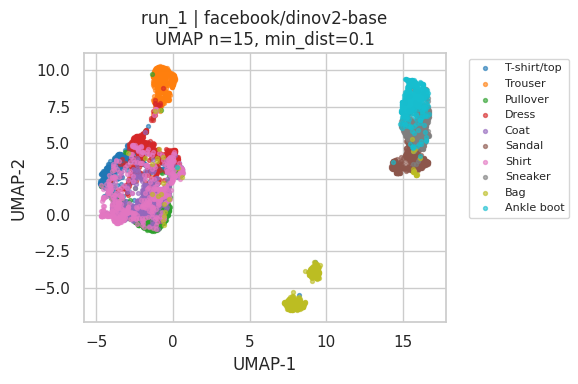

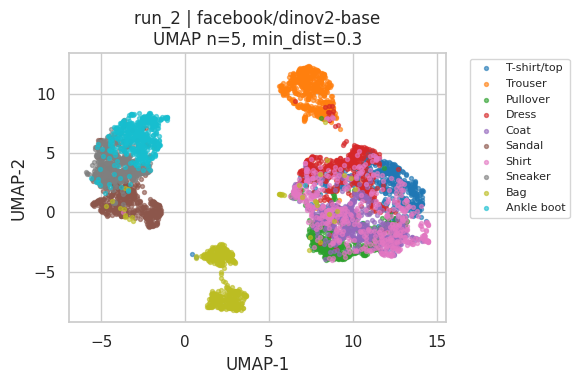

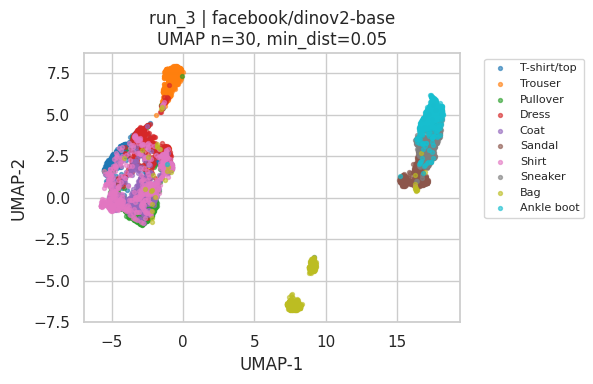

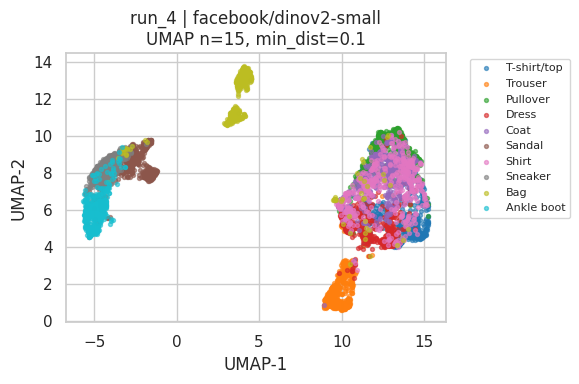

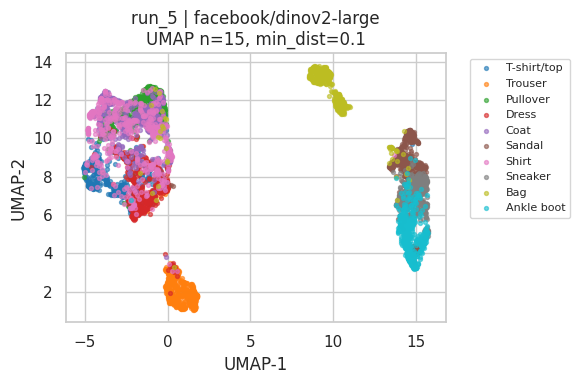

In [14]:
class_names = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

colors = plt.cm.tab10(np.linspace(0, 1, 10))

for r in runs:
    plt.figure(figsize=(6,4))

    for c in range(10):
        mask = r["labels"] == c
        plt.scatter(
            r["umap"][mask, 0],
            r["umap"][mask, 1],
            s=8,
            alpha=0.6,
            color=colors[c],
            label=class_names[c],
        )

    title = (
        f"{r['name']} | {r['metrics']['model']}\n"
        f"UMAP n={r['metrics']['umap_neighbors']}, "
        f"min_dist={r['metrics']['umap_min_dist']}"
    )
    plt.title(title)
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.legend(bbox_to_anchor=(1.05, 1), fontsize=8)
    plt.tight_layout()
    plt.show()


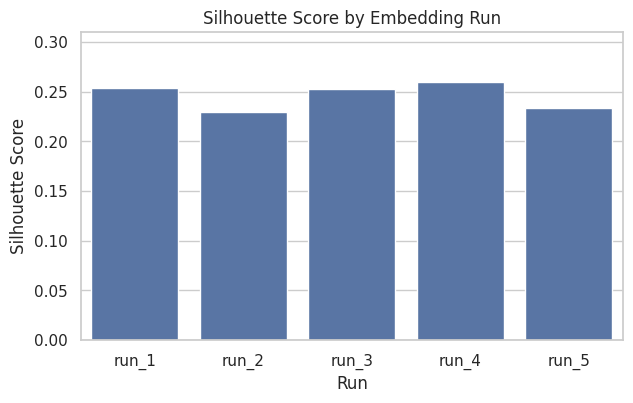

In [15]:
rows = []
for r in runs:
    rows.append({
        "run": r["name"],
        "model": r["metrics"]["model"],
        "umap_neighbors": r["metrics"]["umap_neighbors"],
        "umap_min_dist": r["metrics"]["umap_min_dist"],
        "silhouette": r["metrics"]["silhouette_score"],
    })

df = pd.DataFrame(rows)

plt.figure(figsize=(7,4))
sns.barplot(data=df, x="run", y="silhouette")
plt.title("Silhouette Score by Embedding Run")
plt.ylabel("Silhouette Score")
plt.xlabel("Run")
plt.ylim(0, df["silhouette"].max() + 0.05)
plt.show()
